In [13]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [14]:
cd C:/Users/korat/Desktop/BEP/Programmeren/fastmri/brain

C:\Users\korat\Desktop\BEP\Programmeren\fastmri\brain


In [15]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 1EEB-8C6E

 Directory of C:\Users\korat\Desktop\BEP\Programmeren\fastmri\brain

13-04-2021  11:37    <DIR>          .
13-04-2021  11:37    <DIR>          ..
13-04-2021  11:25    <DIR>          test
13-04-2021  11:38    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  36.000.587.776 bytes free


In [27]:
# here I load the recon_test file
recon_test = h5py.File('test/file_brain_AXFLAIR_200_6002441.h5', 'r')
recon_test.keys()



<KeysViewHDF5 ['ismrmrd_header', 'kspace', 'mask']>

In [29]:
recon_test_kspace = recon_test['kspace']
recon_test_kspace.shape

(16, 20, 640, 320)

In [18]:
recon_train = h5py.File('train/file_brain_AXFLAIR_200_6002425.h5', 'r')
recon_train.keys()

<KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_rss']>

In [19]:
recon_train_kspace = recon_train['kspace']
recon_train = recon_train['reconstruction_rss']

recon_train.shape

(16, 320, 320)

number of non zero elements in k-space 102400


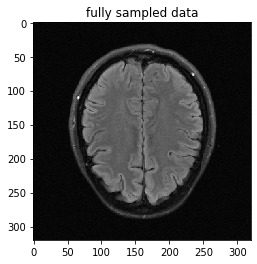

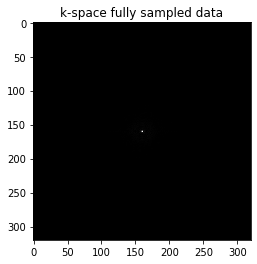

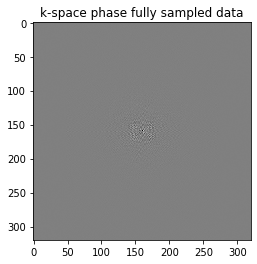

In [77]:
print('number of non zero elements in k-space',np.count_nonzero(np.abs(recon_train_ifft)))
recon_train[5].shape
plt.imshow(np.abs(recon_train[5]), cmap='gray')
plt.title('fully sampled data')
plt.show()

recon_train_ifft =  np.fft.fftshift(np.fft.ifftn(recon_train[5]))
plt.imshow(np.abs(recon_train_ifft), cmap='gray')
plt.title('k-space fully sampled data')
plt.show()

plt.imshow(np.imag(recon_train_ifft), cmap='gray')
plt.title('k-space phase fully sampled data')
plt.show()

number of non zero elements in k-space 20480


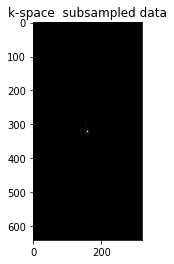

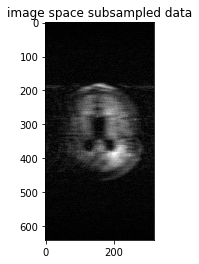

In [76]:
print('number of non zero elements in k-space',np.count_nonzero(np.abs(recon_test_kspace[0][5])))
plt.imshow(np.abs(recon_test_kspace[0][5]), cmap='gray')
plt.title('k-space  subsampled data')
plt.show()

recon_test_FT = np.fft.fftshift(np.fft.fftn(recon_test_kspace[0][5]))
plt.imshow(np.abs(recon_test_FT), cmap='gray')
plt.title('image space subsampled data')
plt.show()

26506


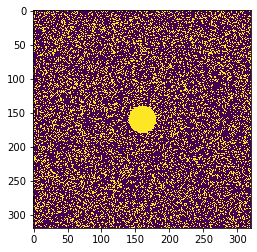

In [123]:
height = 320
width = 320
radius = 20
mask = np.multiply(np.abs(np.random.randint(0,2,(height,width))),np.abs(np.random.randint(0,2,(height,width))))

for i in range(height):
    for j in range(width):
        if np.sqrt(((i-(height/2))**2)+(j-(width/2))**2) <= radius:
            mask[i][j] = 1
print(np.count_nonzero(mask))
plt.imshow(mask)
plt.show()

number of non zero elements in k-space 26506


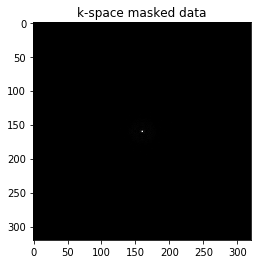

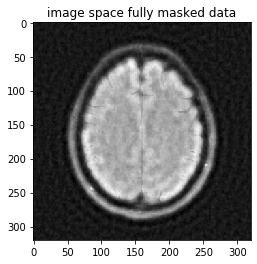

In [124]:
masked_kspace = np.multiply(mask,recon_train_ifft)
print('number of non zero elements in k-space',np.count_nonzero(np.abs(masked_kspace)))

plt.imshow(np.abs(masked_kspace), cmap='gray')
plt.title('k-space masked data')
plt.show()

masked_train_image = np.fft.ifftn(masked_kspace)
plt.imshow(np.abs(masked_train_image), cmap='gray')
plt.title('image space fully masked data')
plt.show()



3


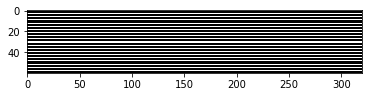

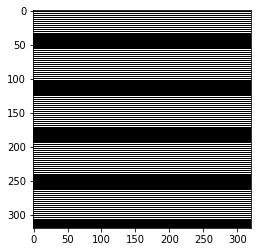

[[0 0 0 ... 1 1 1]
 [0 1 0 ... 0 1 0]
 [1 0 0 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [161]:
#parallel mask 

height = 320
width = 320
number_of_lines = 100r = int(height/number_of_lines)
parallel_mask = np.zeros((height,width))

for i in range(0,height,step):
    parallel_mask[i][:] = 1

#plot loos wierd because lines are missing but they are there in the matrix
plt.imshow(parallel_mask, cmap='gray')
plt.show()    

parallel_masked_kspace = np.multiply(parallel_mask,recon_train_ifft)
print('number of non zero elements in k-space',np.count_nonzero(np.abs(masked_kspace)))

plt.imshow(np.abs(parallel_masked_kspace), cmap='gray')
plt.title('k-space masked data')
plt.show()

parallel_masked_kspace = np.fft.ifftn(masked_kspace)
plt.imshow(np.abs(masked_train_image), cmap='gray')
plt.title('image space fully masked data')
plt.show()


In [146]:
print(parallel_mask[48][1])

0.0
